# Analyzing Second Hand Car Sales Data with Supervised and Unsupervised Learning Models

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScalerwarnings
warnings.filterwarnings("ignore")


# Data Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('car_sales_data.csv' )

In [3]:
## Display the first five rows of the DataFrame 'df'.
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
# Display a concise summary of the DataFrame 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
# Drop duplicates based on all columns
df_no_duplicates = df.drop_duplicates()

# Display the cleaned DataFrame
print("Original number of rows:", len(df))
print("Number of rows after removing duplicates:", len(df_no_duplicates))
print(df_no_duplicates.head())
df = df_no_duplicates.copy()

Original number of rows: 50000
Number of rows after removing duplicates: 49988
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  


**Remove outliers to avoid skewness**

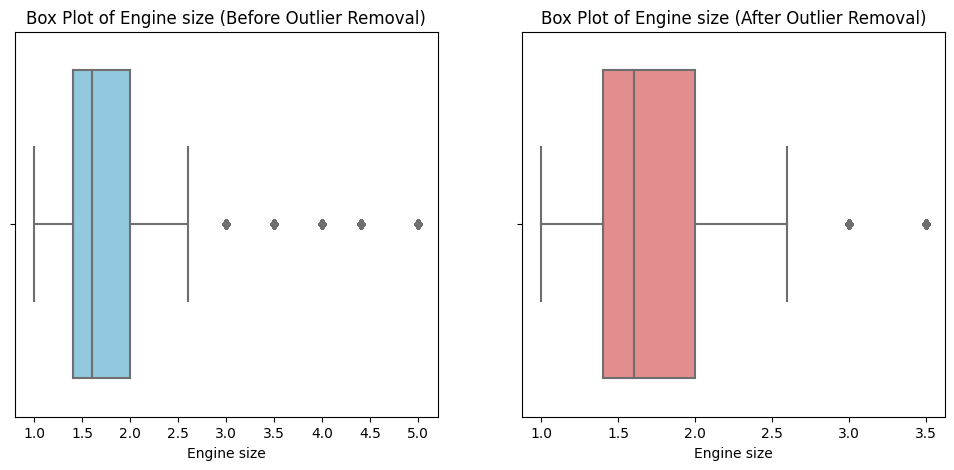

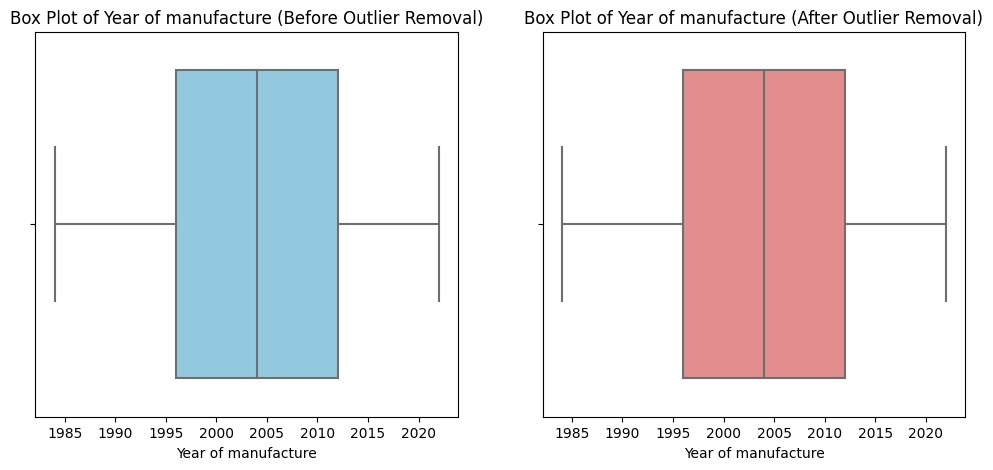

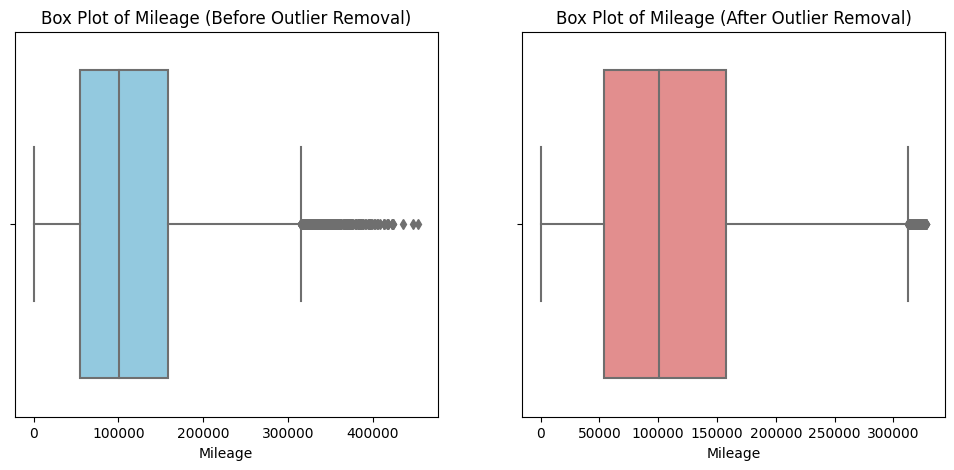

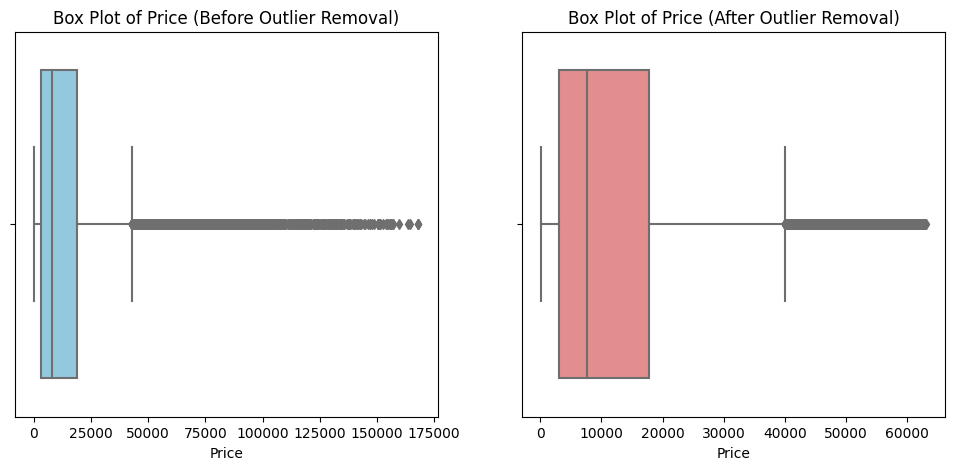

Original number of rows: 49988
Number of rows after handling outliers: 47140
  Manufacturer   Model  Engine size Fuel type  Year of manufacture  Mileage  \
0         Ford  Fiesta          1.0    Petrol                 2002   127300   
2         Ford  Mondeo          1.6    Diesel                 2014    39190   
3       Toyota    RAV4          1.8    Hybrid                 1988   210814   
4           VW    Polo          1.0    Petrol                 2006   127869   
5         Ford   Focus          1.4    Petrol                 2018    33603   

   Price  
0   3074  
2  24072  
3   1705  
4   4101  
5  29204  


In [6]:
# Function to identify and handle outliers based on z-scores
def handle_outliers(df, columns, z_threshold=3):
    df_no_outliers = df.copy()

    for col in columns:
        # Calculate z-scores for each value in the column
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

        # Identify outliers based on the z-threshold
        outliers_mask = z_scores > z_threshold

        # Replace outliers with NaN or remove them based on your preference
        # df_no_outliers[col][outliers_mask] = np.nan
        df_no_outliers = df_no_outliers[~outliers_mask]

        # Visualize box plots before and after removing outliers
        plt.figure(figsize=(12, 5))

        # Box plot before removing outliers
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Box Plot of {col} (Before Outlier Removal)')

        # Box plot after removing outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_no_outliers[col], color='lightcoral')
        plt.title(f'Box Plot of {col} (After Outlier Removal)')

        plt.show()

    return df_no_outliers

# Specify numerical columns for outlier analysis
numerical_columns_for_outliers = ['Engine size', 'Year of manufacture', 'Mileage', 'Price']

# Handle outliers in specified numerical columns
df_no_outliers = handle_outliers(df, numerical_columns_for_outliers)

# Display the cleaned DataFrame without outliers
print("Original number of rows:", len(df))
print("Number of rows after handling outliers:", len(df_no_outliers))
print(df_no_outliers.head())
df = df_no_outliers.copy()

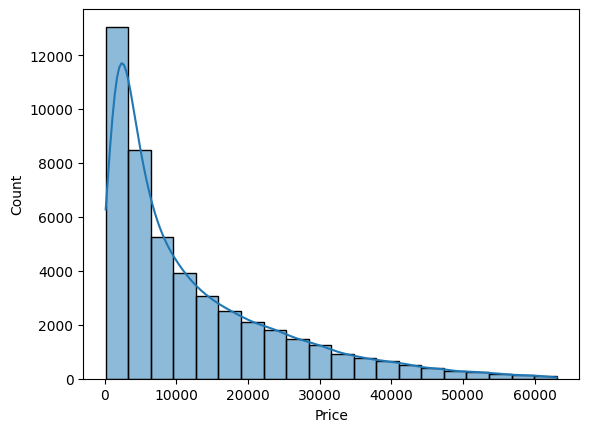

In [7]:
#visualise price count
price_histplot=sns.histplot(df["Price"], bins = 20, kde = True, )
price_histplot.get_figure().savefig("price_histplot.png")


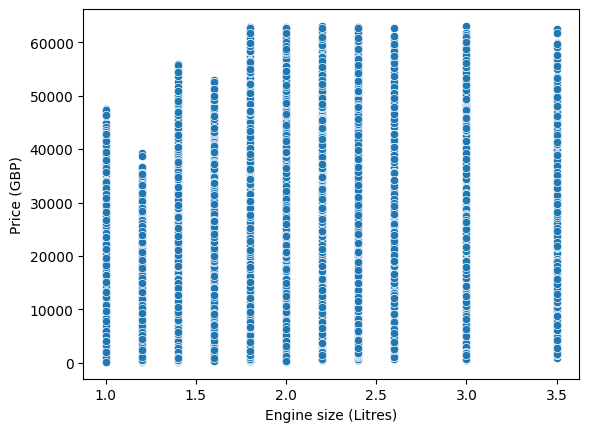

In [8]:
# Create a scatter plot to visualize the relationship between 'Engine size' and 'Price' in the DataFrame 'df'.
# This helps identify any patterns or correlations between the engine size of a car and its price.
sns.scatterplot(data = df, x = "Engine size", y = "Price")

plt.xlabel("Engine size (Litres)")
plt.ylabel("Price (GBP)")

plt.show()

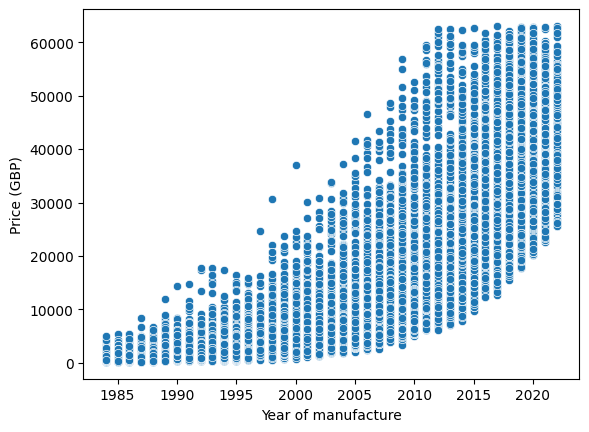

In [9]:
# Create a scatter plot to visualize the relationship between 'Year of manufacture' and 'Price' in the DataFrame 'df'.
# This helps identify any patterns or correlations between the year of manufacture of a car and its price.
sns.scatterplot(data = df, x = "Year of manufacture", y = "Price")

plt.xlabel("Year of manufacture")
plt.ylabel("Price (GBP)")

plt.show()

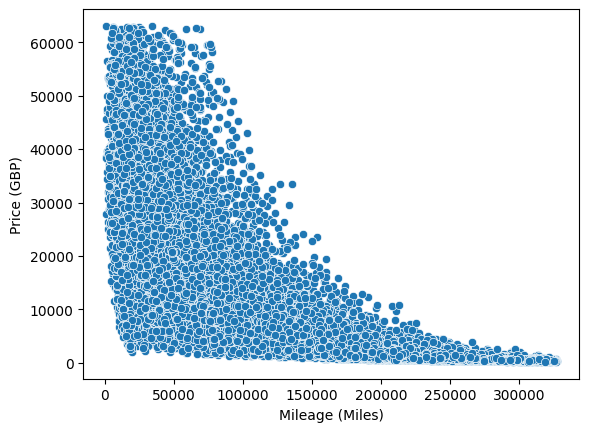

In [10]:
# Create a scatter plot to visualize the relationship between 'Mileage and 'Price' in the DataFrame 'df'.
# This helps identify any patterns or correlations between the Mileage of a car and its price.
sns.scatterplot(data = df, x = "Mileage", y = "Price")

plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (GBP)")

plt.show()

<Axes: >

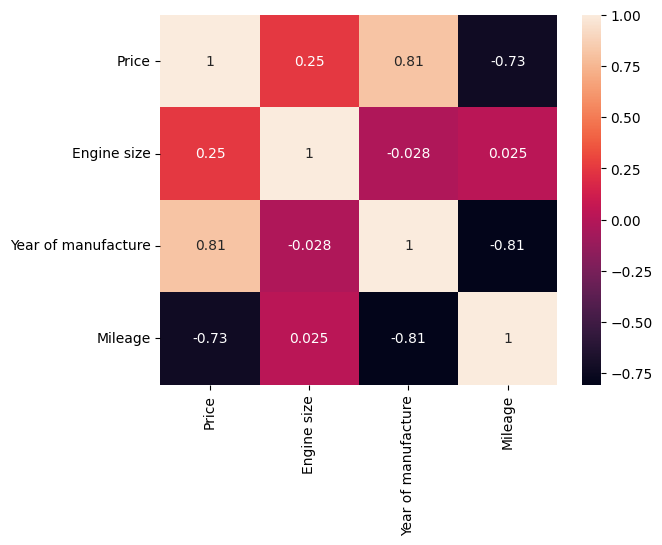

In [11]:
# Define which variables we want to use to calculate the correlation␣coefficients.
column_list = ["Price", "Engine size", "Year of manufacture", "Mileage"]
# Calculate the correlation coefficients, and then plot them
# using Seaborn's heatmap() function
sns.heatmap(df[column_list].corr(), annot = True)

# A simple linear Regression and Polynomial Regression: 

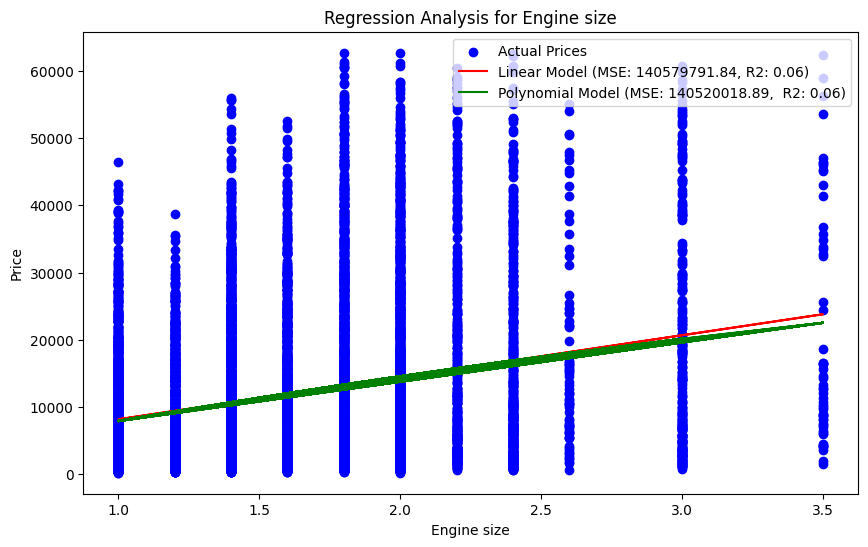

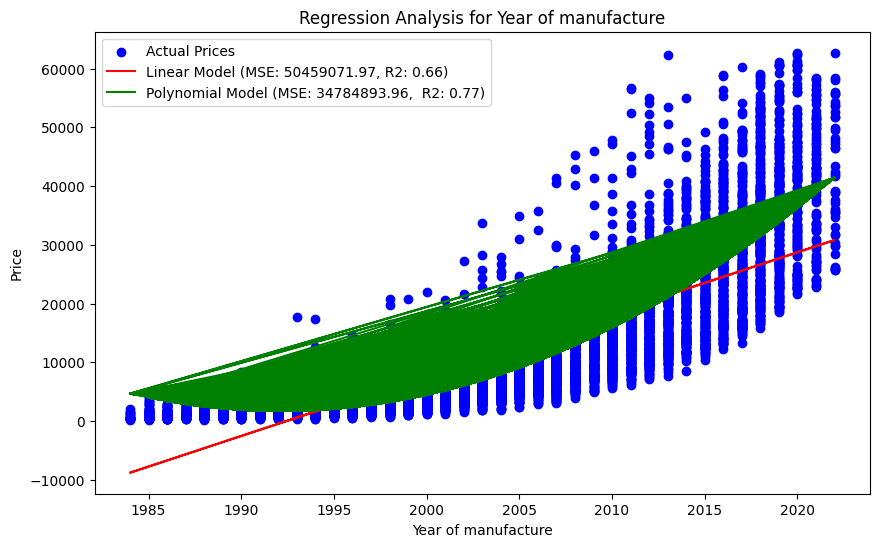

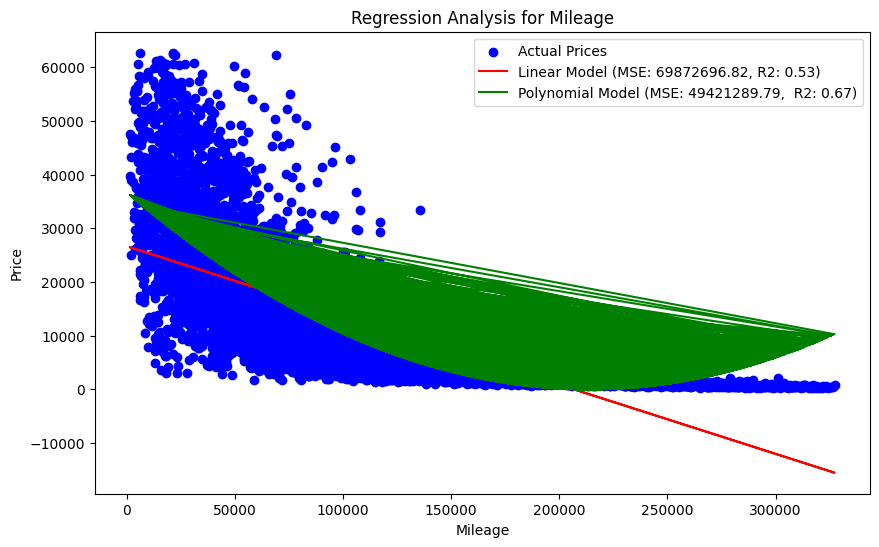

In [12]:
# Select numerical features
numerical_features = ['Engine size', 'Year of manufacture', 'Mileage']

# Loop through numerical features
for feature in numerical_features:
    # Prepare the data
    X = df[[feature]]
    y = df['Price']


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    scaler = StandardScaler()
    
    # Now apply the standard scaler transformation to both the training and the testing sets.
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    y_pred_linear = linear_model.predict(X_test_scaled)

    # Polynomial Regression (degree=2)
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X_train_scaled)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)
    X_test_poly = poly_features.transform(X_test_scaled)
    y_pred_poly = poly_model.predict(X_test_poly)

    # Evaluate and compare models
    
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_linear = r2_score(y_test, y_pred_linear)  
    r2_poly = r2_score(y_test, y_pred_poly)
    
    
    # Extract the actual values for X_test
    X_test_actual = scaler.inverse_transform(X_test_scaled)

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_actual, y_test, color='blue', label='Actual Prices')
    plt.plot(X_test_actual, y_pred_linear, color='red', label=f'Linear Model (MSE: {mse_linear:.2f}, R2: {r2_linear:.2f})')
    plt.plot(X_test_actual, y_pred_poly, color='green', label=f'Polynomial Model (MSE: {mse_poly:.2f},  R2: {r2_poly:.2f})')
    plt.title(f'Regression Analysis for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# 2B Multiple Linear Regression

In [13]:
# Extract the input features. Note that we do not need to re-shape x in this example, because it is already a 2-dimensional array.
feature_names = ["Engine size", "Year of manufacture", "Mileage"]
x = df[feature_names]

# Extract the output feature
y = df["Price"]

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
car_sales_linear = LinearRegression()

# Fit the model to the training data.
car_sales_linear.fit(x_train_scaled, y_train)

# Get the fit coefficients from the best-fit model.
intercept = car_sales_linear.intercept_
coefficients = car_sales_linear.coef_

# Print the coefficients.
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the trained model to predict the
# outputs (price)
car_sales_pred = car_sales_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, car_sales_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, car_sales_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, car_sales_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [ 3308.01427367  7893.89456247 -2674.13445997]
intercept:  12205.469107976187
Mean absolute error:  4574.517189084775
Mean squared error:  37057851.91395801
Root mean squared error:  6087.51607094043
R2:  0.7528161660628779


# A Random Forest Regression Model: Numerical Inputs

In [14]:
# Select all relevant features (numerical and categorical)
feature_names = ["Engine size", "Year of manufacture", "Mileage"]
x = df[feature_names]

# Extract the output feature
y = df["Price"]

# Split the x and y data between the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that we have in x_train.
scale.fit(x_train)

# Apply the standard scaler transformation to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Create an instance of the model
car_sales_linear = RandomForestRegressor()

# Fit the model to the training data.
car_sales_linear.fit(x_train_scaled, y_train)

# Use the trained model to predict the outputs (price) 
car_sales_pred = car_sales_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, car_sales_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, car_sales_pred)

# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, car_sales_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  2038.2204901382913
Mean squared error:  12190172.945889894
Root mean squared error:  3491.4428172160997
R2:  0.9186889274608304


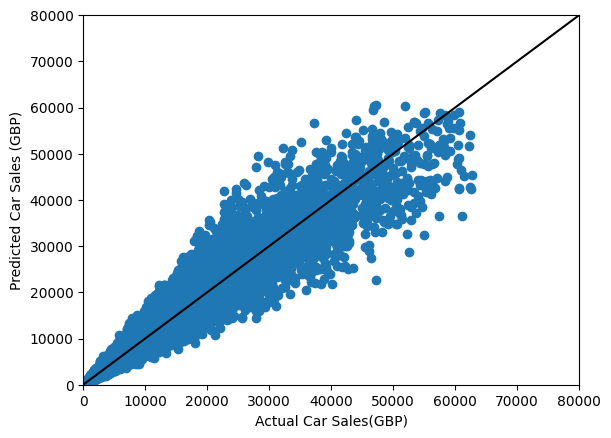

In [15]:
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, car_sales_pred)
# Add a straight diagonal line to the plot.
# If the model is performing well, the data
# points should lie along this line, meaning
# that the predicted values are equal to the
# actual values.
plt.plot([0, 80000], [0, 80000], 'k-')

# Label both axes.
plt.xlabel("Actual Car Sales(GBP)")
plt.ylabel("Predicted Car Sales (GBP)")

# Limit the range of values on both axes
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.show()

# 2C  A Random Forest Regression Model: Numerical and Categorical Inputs

In [16]:
# use one hot encoding to conver the categorical variables to numerical of 0, 1s
# Select all relevant features (numerical and categorical)
numerical_features = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

# Prepare the data
X_all = df[numerical_features + categorical_features]
y_all = df['Price']

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Define preprocessor for numerical and categorical features
numerical_scaler = StandardScaler()
categorical_scaler = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_scaler, numerical_features),
        ('cat', categorical_scaler, categorical_features)
    ]
)


# Create a pipeline with preprocessor and Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


# Train the model
model.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model.predict(X_test_all)

# Evaluate the model
mse_all = mean_squared_error(y_test_all, y_pred_all)
print(f'Mean Squared Error (Random Forest): {mse_all:.2f}')

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test_all, y_pred_all)

# Calculate the root mean squared error
rms_error = np.sqrt(mse_all)

# Calculate the R2 score
R2 = r2_score(y_test_all, y_pred_all)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean Squared Error (Random Forest): 261289.62
Mean absolute error:  251.711438268986
Root mean squared error:  511.1649676397335
R2:  0.9982571420703661


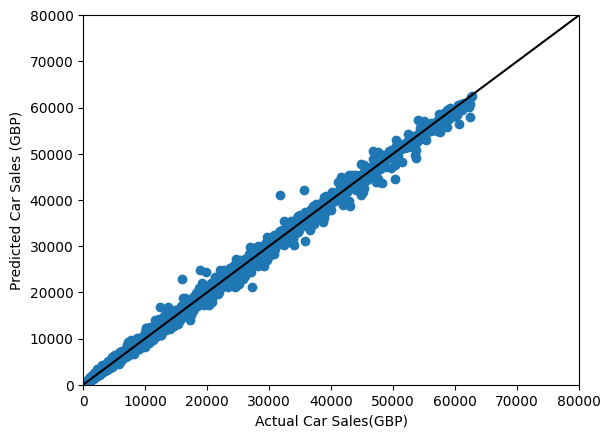

In [17]:
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, y_pred_all )

# Add a straight diagonal line to the plot.
# If the model is performing well, the data points should lie along this line,
# meaning that the predicted values are equal to the actual values.
plt.plot([0, 80000], [0, 80000], 'k-')

# Label both axes.
plt.xlabel("Actual Car Sales(GBP)")
plt.ylabel("Predicted Car Sales (GBP)")

# Limit the range of values on both axes
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.show()

# ANN Model

In [ ]:
# Extract the input features, which we will call x.
feature_names = ["Mileage", "Engine size", "Year of manufacture"]
x_numerical = car_sales_df[feature_names]
# Extract the output features, which we will call y.
y = car_sales_df["Price"]

# Import the LabelEncoder class from sklearn.
from sklearn.preprocessing import LabelEncoder

# Feature Scaling with MinMaxScaler
scale = MinMaxScaler()
x_numerical_scaled = scale.fit_transform(x_numerical)

# Extract the categorical columns
cat_columns = ["Manufacturer", "Fuel type", "Model"]
x_cat = car_sales_df[cat_columns]

# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
x_cat_encoded = x_cat.copy()

for col in cat_columns:
    x_cat_encoded[col] = label_encoder.fit_transform(x_cat[col])

# x_cat_encoded contains the label-encoded categorical columns


# concatenate the numerical and categorical
# input features into a single array.
x = np.concatenate((x_numerical_scaled, x_cat_encoded), axis = 1)

# Split between training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()

# Add the first hidden layer, with input_dim = 4, 64 units, and the ReLU activation function.
model.add(Dense(units = 64, input_dim = (6), activation = "relu"))

# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))


# The output layer, this will have 1 unit because we are predicting one value(the price). Also, we will use the linear
# activation function, because this is a regression problem, predicting a continuous output variable.
model.add(Dense(units = 1, activation = "linear"))

# Print a summary of the model
model.summary()

# Compile the model, using the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

# Define the early stopping criterion, with a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Train the model
history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

In [ ]:
# Predict the model outputs for the testing set.
y_pred = model.predict(x_test)

# Plot predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 300)
plt.scatter(y_test, y_pred)

# Plot a diagonal line to show the one-to-one relation.
plt.plot([0, 175000], [0, 175000], 'k-')

# Label both axes.
plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")

# Limit the range of values on both axes.
plt.xlim(0, 175000)
plt.ylim(0, 175000)

# Show the plot.
plt.show()

# Create a pandas dataframe containing the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Show the plot.
plt.show()

# K-Means Model

Features: ['Engine size'], k: 2, Silhouette Score: 0.62, Davies-Bouldin Index: 0.58
Features: ['Engine size'], k: 3, Silhouette Score: 0.62, Davies-Bouldin Index: 0.57
Features: ['Year of manufacture'], k: 2, Silhouette Score: 0.62, Davies-Bouldin Index: 0.51
Features: ['Year of manufacture'], k: 3, Silhouette Score: 0.58, Davies-Bouldin Index: 0.51
Features: ['Mileage'], k: 2, Silhouette Score: 0.60, Davies-Bouldin Index: 0.55
Features: ['Mileage'], k: 3, Silhouette Score: 0.57, Davies-Bouldin Index: 0.53
Features: ['Engine size', 'Year of manufacture'], k: 2, Silhouette Score: 0.36, Davies-Bouldin Index: 1.13
Features: ['Engine size', 'Year of manufacture'], k: 3, Silhouette Score: 0.37, Davies-Bouldin Index: 0.92
Features: ['Engine size', 'Mileage'], k: 2, Silhouette Score: 0.36, Davies-Bouldin Index: 1.17
Features: ['Engine size', 'Mileage'], k: 3, Silhouette Score: 0.38, Davies-Bouldin Index: 0.88
Features: ['Year of manufacture', 'Mileage'], k: 2, Silhouette Score: 0.53, Davies-B

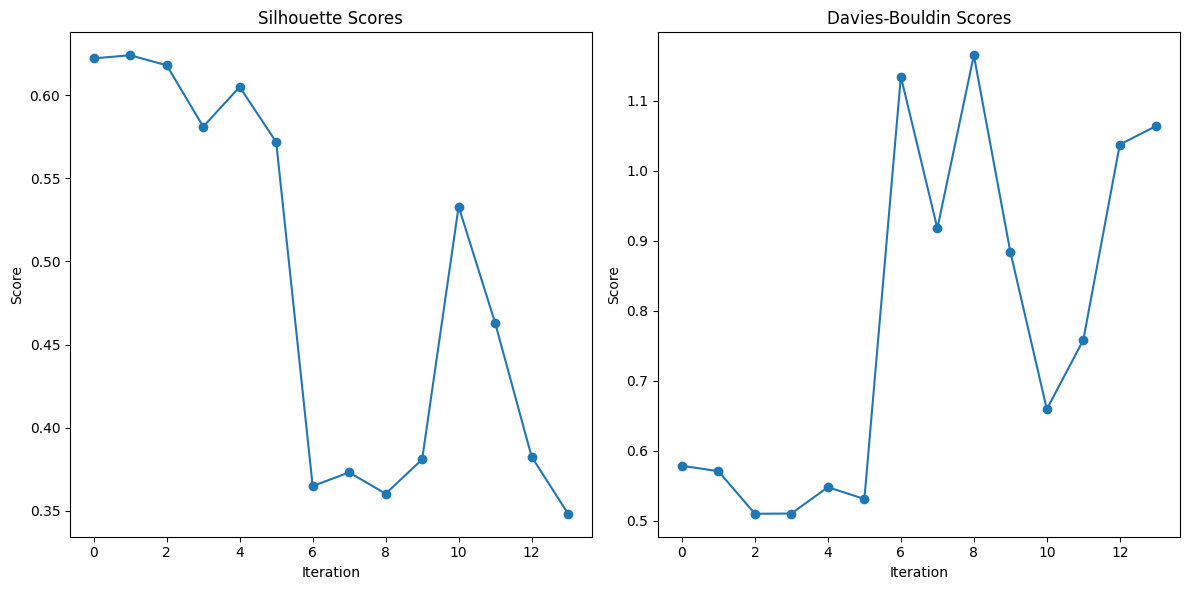

Best k-Means Model: KMeans(n_clusters=2, random_state=42)
Best Silhouette Score: 0.38
Best Davies-Bouldin Index: 1.04


In [18]:
# Select numerical features for clustering
numerical_features_for_clustering = ['Engine size', 'Year of manufacture', 'Mileage']

# Prepare the data
X_clustering = df[numerical_features_for_clustering]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

best_kmeans_model = None
best_silhouette_score = -1  # Initialize to a low value
best_davies_bouldin_score = np.inf  # Initialize to a high value

# Lists to store results for plotting
silhouette_scores = []
davies_bouldin_scores = []
best_kmeans_models = {}

# Iterate through different combinations of numerical variables
for i in range(1, len(numerical_features_for_clustering) + 1):
    combinations = itertools.combinations(numerical_features_for_clustering, i)
    
    for combo in combinations:
        current_features = list(combo)
        
        best_kmeans_model = None
        best_silhouette_score = -1
        best_davies_bouldin_score = np.inf
        
        for k in range(2, 4):
            kmeans = KMeans(n_clusters=k, random_state=42)
            clusters = kmeans.fit_predict(X_scaled[:, [X_clustering.columns.get_loc(feature) for feature in current_features]])
            
            silhouette = silhouette_score(X_scaled[:, [X_clustering.columns.get_loc(feature) for feature in current_features]], clusters)
            davies_bouldin = davies_bouldin_score(X_scaled[:, [X_clustering.columns.get_loc(feature) for feature in current_features]], clusters)
            
            print(f'Features: {current_features}, k: {k}, Silhouette Score: {silhouette:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}')
            
            silhouette_scores.append(silhouette)
            davies_bouldin_scores.append(davies_bouldin)
            
            # Check if current model has a better silhouette score
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_davies_bouldin_score = davies_bouldin
                best_kmeans_model = kmeans
        
        # Save the best model for the current combination of features
        best_kmeans_models[tuple(current_features)] = {
            'model': best_kmeans_model,
            'silhouette_score': best_silhouette_score,
            'davies_bouldin_score': best_davies_bouldin_score
        }

# Print and use the best models
for features, result in best_kmeans_models.items():
    print(f'Features: {features}, Best k-Means Model: {result["model"]}')
    print(f'Best Silhouette Score: {result["silhouette_score"]:.2f}')
    print(f'Best Davies-Bouldin Index: {result["davies_bouldin_score"]:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Iteration')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Scores')
plt.xlabel('Iteration')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Print the best results
print(f'Best k-Means Model: {best_kmeans_model}')
print(f'Best Silhouette Score: {best_silhouette_score:.2f}')
print(f'Best Davies-Bouldin Index: {best_davies_bouldin_score:.2f}')

# Hierarchical Clustering

In [ ]:
# Import the AgglomerativeClustering model from
# the sklearn library.
from sklearn.cluster import AgglomerativeClustering

# Select numerical features for clustering
numerical_features_for_clustering = ['Engine size', 'Year of manufacture', 'Mileage', 'Price']

# Prepare the data
X_clustering = df[numerical_features_for_clustering]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

best_agglo_model = None
best_silhouette_score = -1  # Initialize to a low value
best_davies_bouldin_score = np.inf  # Initialize to a high value

# Lists to store results for plotting
silhouette_scores = []
davies_bouldin_scores = []
best_agglo_models = {}

#Iterate through different combinations of numerical variables
for i in range(1, len(numerical_features_for_clustering) + 1):
    combinations = itertools.combinations(numerical_features_for_clustering, i)
    
    for combo in combinations:
        current_features = list(combo)
        
        best_agglo_model = None
        best_silhouette_score = -1  # Initialize to a low value
        best_davies_bouldin_score = np.inf  # Initialize to a high value
        
        for k in range(2, 4):
            agg_model = AgglomerativeClustering(n_clusters = k, linkage = 'complete')  # Create an instance of the AgglomerativeClustering
            clusters = agg_model.fit_predict(X_scaled[:, [X_clustering.columns.get_loc(feature) for feature in current_features]])
            
            silhouette = silhouette_score(X_scaled[:, [X_clustering.columns.get_loc(feature) for feature in current_features]], clusters)
            davies_bouldin = davies_bouldin_score(X_scaled[:, [X_clustering.columns.get_loc(feature) for feature in current_features]], clusters)
            
            print(f'Features: {current_features}, k: {k}, Silhouette Score: {silhouette:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}')
            
            # Append metric scores to list 
            silhouette_scores.append(silhouette)
            davies_bouldin_scores.append(davies_bouldin)
            
             # Check if current model has a better silhouette score
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_davies_bouldin_score = davies_bouldin
                best_agglo_model = agg_model
                    
        # Save the best model for the current combination of features
        best_agglo_models[tuple(current_features)] = {
            'model': best_agglo_model,
            'silhouette_score': best_silhouette_score,
            'davies_bouldin_score': best_davies_bouldin_score
        }
        

# Print and use the best models as needed
for features, result in best_agglo_models.items():
    print(f'Features: {features}, Best k-Means Model: {result["model"]}')
    print(f'Best Silhouette Score: {result["silhouette_score"]:.2f}')
    print(f'Best Davies-Bouldin Index: {result["davies_bouldin_score"]:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Iteration')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Scores')
plt.xlabel('Iteration')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Print the best results
print(f'Best Agglo Model: {best_agglo_model}')
print(f'Best Silhouette Score: {best_silhouette_score:.2f}')
print(f'Best Davies-Bouldin Index: {best_davies_bouldin_score:.2f}')

Features: ['Engine size'], k: 2, Silhouette Score: 0.66, Davies-Bouldin Index: 0.33
Features: ['Engine size'], k: 3, Silhouette Score: 0.62, Davies-Bouldin Index: 0.46
Features: ['Year of manufacture'], k: 2, Silhouette Score: 0.53, Davies-Bouldin Index: 0.52
Features: ['Year of manufacture'], k: 3, Silhouette Score: 0.58, Davies-Bouldin Index: 0.52
